# 4サイトHubbard模型のHartree Fock近似
このノートでは、4サイト1次元ハバード(Hubbard)模型にHartree Fock近似を行い、基底状態と基底エネルギーを求めます。言語はJulia 1.1です。

## モデル
1次元ハバード(Hubbard)模型:

$$
H = -t \sum_{i} \sum_{\sigma} (c_{i \sigma}^{\dagger} c_{i+1 \sigma}+ c_{i+1 \sigma}^{\dagger} c_{i \sigma}) - \mu \sum_i \sum_{\sigma} c_{i \sigma}^{\dagger} c_{j \sigma} + U \sum_i n_{i \uparrow} n_{i \downarrow}
$$
を考えます。
ここで、$c_{i \sigma}$は、サイト$i$、スピン$\sigma$のフェルミオンの消滅演算子です。また、$n_{i \sigma} = c_{i \sigma}^{\dagger} c_{i \sigma}$です。
格子の数は4とし、周期的境界条件が課されているとします。

## ヒルベルト空間
格子の一つ一つにはアップスピンの電子かダウンスピンの電子が入ります。
ですので、一つのサイトでは、

$$
|0\rangle \\
c_{\uparrow}^{\dagger} |0\rangle = |\uparrow \rangle \\
c_{\downarrow}^{\dagger} |0\rangle = |\downarrow \rangle \\
c_{\uparrow}^{\dagger} c_{\downarrow}^{\dagger}  |0\rangle = |\uparrow \downarrow \rangle 
$$

の4つの状態があります。つまり、$N$サイトある場合には、$4^N$個の状態が存在します。今、$N=4$を考えているので、状態は全部で$4^4 = 256$通りです。
この状態を表現するために、以下のようにしてみましょう：

$$
c_{1 \uparrow}^{\dagger} |0\rangle = |0000;0001 \rangle  \\
c_{2 \downarrow}^{\dagger}   c_{2 \uparrow}^{\dagger} |0\rangle = |0010;0010 \rangle \\
 c_{2 \downarrow}^{\dagger} c_{2 \uparrow}^{\dagger} c_{1 \uparrow}^{\dagger}  |0\rangle = |0010;0011 \rangle  \\
$$

ここで、$|0010;0011 \rangle $は、アップスピンがサイト2とサイト1に、ダウンスピンがサイト1に入っていることを意味します。サイトに電子がいるかいないかを0と1で表し、右側の四つがアップスピン、左側の四つをダウンスピンの位置としました。右端をサイト1、左端をサイト4とします。
さらに、この８つの0と1の集まりを二進法と見なせば、状態にラベルをつけることができます。例えば、$|0000;0001 \rangle $は$00000001=1$、
$|0010;0011 \rangle $は$00100011 = 35$となります。状態は全部0から全部1まであるので、状態の番号は0から255までになります。

### 粒子数の制限

全体のヒルベルト空間の次元は4サイトで256ですので、256個の基底を用意すれば表現することができます。
そのため、上では$ c_{2 \downarrow}^{\dagger} c_{2 \uparrow}^{\dagger} c_{1 \uparrow}^{\dagger}  |0\rangle = |0010;0011 \rangle$のような基底を用意しました。
もし、粒子数がある値の波動関数を求めたいのであれば、その粒子数の基底だけを用意すれば良いです。
4サイトハバード模型の場合には、アップスピンとダウンスピンがあるので最大で8個入ります。
m個の電子がある場合には、

$$
_8 C_m
$$

個の基底を用意することになります。
ハーフフィリング（4個）の場合は、70個です。


## 基底の変換
さて、上ではあるサイトに電子がいるかどうか、という基底を使ってきました。
しかし、この基底が全てではありません。例えば、

$$
|v_1 \rangle = (1/\sqrt{2}) |0000;0001 \rangle + (1/\sqrt{2})  |0000;0010 \rangle 
$$
のような線型結合を基底としても構いません。これを生成演算子で書くと、

$$
|v_1 \rangle = (1/\sqrt{2}) c_{1 \uparrow}^{\dagger} |0\rangle + (1/\sqrt{2})  c_{2 \uparrow}^{\dagger} |0\rangle \\
|v_1 \rangle =  (1/\sqrt{2}) (c_{1 \uparrow}^{\dagger}+c_{2 \uparrow}^{\dagger})|0\rangle 
$$
とできるので、
$$
a_1^{\dagger} |0\rangle = (1/\sqrt{2}) (c_{1 \uparrow}^{\dagger}+c_{2 \uparrow}^{\dagger})|0\rangle \\
a_1^{\dagger} = (1/\sqrt{2}) (c_{1 \uparrow}^{\dagger}+c_{2 \uparrow}^{\dagger})
$$
のように、新しい生成演算子を定義することができます。

一般的には、

$$
a_i^{\dagger} = \sum_j u_{ij} c_j^{\dagger}
$$
と書くことができます。ここで定義した$a_i^{\dagger}$がフェルミオンの生成演算子である条件は、反交換関係：

$$
a_{i }^{\dagger} a_{j} + a_{j} a_{i}^{\dagger} = \delta_{ij}  \\
a_{i}^{\dagger} a_{j}^{\dagger} + a_{j}^{\dagger}  a_{i}^{\dagger} = 0 \\
a_{i} a_{j}+ a_{j} a_{i} = 0 
$$
を満たすことです。
代入してみると、

$$
a_{i }^{\dagger} a_{j} + a_{j} a_{i}^{\dagger} = \sum_{kl} u_{ik} u_{jl}^{\ast} (c_{k }^{\dagger} c_{l} + c_{l} c_{k}^{\dagger} )\\
= \sum_{k} u_{ik} u_{jk}^{\ast}  = \delta_{ij}
$$
という$u_{ik} $に関する条件が現れます。これは$u_{ik}$がユニタリー行列の要素であることを意味します。

## Hatree-Fock近似
それでは、Hatree-Fock近似をやってみましょう。以後は粒子数は4(ハーフフィリング)とします。
まず、基底状態の波動関数の形を

$$
|g \rangle = a_4^{\dagger}a_3^{\dagger}a_2^{\dagger}a_1^{\dagger} |0 \rangle
$$
とします。ここで生成演算子$a_i^{\dagger}$がどんなフェルミオンであるかは全くわかりません。
わかっているのは、サイトでのフェルミオンの生成演算子の線型結合

$$
a_i^{\dagger} = \sum_{j=1}^{8} u_{ij} c_j^{\dagger}
$$
であるということだけです。ここで、$j>4$はダウンスピンを意味することとします。
わからない係数は$u_{ij}$で、全部で$8 \times 4 = 32$あります。ハーフフィリングでは基底が70個必要であったことを考えると、
全ての波動関数を表現することはできないことがわかります。
この仮定した波動関数の形の中で、エネルギーが最小となる$u_{ij}$のセットを見つけるのがHatree-Fock近似です。
また、定義した$a_i^{\dagger}$がフェルミオンの生成演算子である条件も必要です。

つまり、

$$
\sum_{k} u_{ik} u_{jk}^{\ast}  = \delta_{ij}
$$
という拘束条件のもと

$$
E(\{ u_{ij} \}) = \langle g (\{ u_{ij} \})|H|g ( \{ u_{ij} \}) \rangle 
$$
を最小化する$u_{ij}$を探します。
これはラグランジュの未定乗数法が使えて、

$$
E(\{ u_{ij} \})  - \sum_{ij} \lambda_{ij} \left(\sum_{k} u_{ik} u_{jk}^{\ast} - \delta_{ij}\right)
$$
を最小化すれば良いです。以後の計算を楽にするため、ユニタリー行列が$U^{\dagger} U = U U^{\dagger} = 1$となることを用いて、拘束条件を


$$
\sum_{k} u_{ki}^{\ast} u_{kj}  = \delta_{ij}
$$
として、
$$
E(\{ u_{ij} \})  - \sum_{ij} \lambda_{ij} \left(\sum_{k} u_{ki}^{\ast} u_{kj}  - \delta_{ij}\right)
$$
を最小化することにします。さらに、ユニタリー行列なので$\lambda_{ij} = \lambda_{ji}$としても良くて、$\lambda_{ij}$は実対称行列となり、

$$
\lambda_{ij} = \sum_n P_{in} \epsilon_n P_{jn}^{\ast}
$$
となります。そこで、

$$
\sum_{ij} \lambda_{ij} \left(\sum_{k} u_{ki}^{\ast} u_{kj}  - \delta_{ij}\right) = 
\sum_{ij} \sum_n \epsilon_n \left(\sum_{k} P_{in} u_{ki}^{\ast} u_{kj}P_{jn}^{\ast}  - \delta_{ij}\right)\\
= \sum_n \epsilon_n (u_{kn}^{' \ast}u_{kn}' - 1 )
$$
となります。ここで、$u_{kn}^{' \ast} = \sum_i P_{in} u_{ki}^{\ast}$は$u_{ki}^{\ast}$にユニタリー行列をかけたものなので、
$u_{kn}^{' \ast}$を決める問題に書き直しても問題ありません。つまり、


$$
E(\{ u_{ij}' \})  - \sum_n \epsilon_n (u_{kn}^{' \ast}u_{kn}' - 1 ) 
$$
を最小化すればよいです。$u_{kn}^{' \ast} \rightarrow u_{kn}^{\ast}$と置き直し
$u_{ki}^{\ast}$で微分すれば、

$$
\frac{\partial E(\{ u_{ij} \}) }{ \partial u_{ki}^{\ast}} -  \epsilon_i u_{ki} =0
$$
となり、この方程式を解いて$\{ u_{ij} \}$を求めればよいです。


### 一体部分
エネルギーを計算するために、

$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j |g ( \{ u_{ij} \}) \rangle 
$$
を計算します。
そのため、

$$
\sum_i u_{ik}^{\ast}  a_i^{\dagger} = \sum_i \sum_{j=1}^{8} u_{ij} u_{ik}^{\ast} c_j^{\dagger} \\
\sum_i u_{ij}^{\ast}  a_i^{\dagger} = c_j^{\dagger} 
$$
を使います。
よって、


$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j |g ( \{ u_{ij} \}) \rangle  = \sum_k \sum_l u_{ki}^{\ast}  u_{lj} 
\langle g (\{ u_{ij} \})| a_k^{\dagger} a_l |g ( \{ u_{ij} \}) \rangle 
$$
となります。
さて、$a_l |g ( \{ u_{ij} \}) \rangle$ですが、$a_l$が消滅演算子なので、波動関数の中に$a_l^{\dagger}$が含まれていないとゼロになります。それ以外の場合には、生成演算子が一つ減って粒子数が3になります。
また、$\langle g (\{ u_{ij} \})| a_k^{\dagger}$も波動関数の中に$ a_k^{\dagger}$が入ってなければならず、入っている場合には粒子数が3のブラ
ベクトルになります。この二つの内積ですが、同じ種類の同じ数の生成演算子が含まれていなければ、ゼロになります。
よって、

$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j |g ( \{ u_{ij} \}) \rangle  = \sum_{k, k \le 4} u_{ki}^{\ast}  u_{kj} 
$$
です。
これは、消滅させたらその分ちゃんと生成する必要がある、ということです。

### 2体部分
次に、

$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j^{\dagger} c_k c_l |g ( \{ u_{ij} \}) \rangle 
$$
を計算します。
一体部分の時と同じように、

$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j^{\dagger} c_k c_l |g ( \{ u_{ij} \}) \rangle = \sum_{opqr} u_{oi}^{\ast}  u_{pj}^{\ast} u_{qk}  u_{rl } \langle g (\{ u_{ij} \})|a_o^{\dagger} a_p^{\dagger} a_q a_r |g ( \{ u_{ij} \}) \rangle 
$$
となります。ここで、生成演算子と消滅演算子のラベルが一致していなければ値がゼロになることに注意すると、
$o=r$かつ$p=q$のときか、$o=q$かつ$p=r$の時のみ値があることになります。したがって、

$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j^{\dagger} c_k c_l |g ( \{ u_{ij} \}) \rangle = \sum_{op} u_{oi}^{\ast}  u_{pj}^{\ast} u_{pk}  u_{ol } \langle g (\{ u_{ij} \})|a_o^{\dagger} a_p^{\dagger} a_p a_o |g ( \{ u_{ij} \}) \rangle 
+\sum_{op} u_{oi}^{\ast}  u_{pj}^{\ast} u_{ok}  u_{pl } \langle g (\{ u_{ij} \})|a_o^{\dagger} a_p^{\dagger} a_o a_p |g ( \{ u_{ij} \}) \rangle \\
= \sum_{op} (u_{oi}^{\ast}  u_{pj}^{\ast} u_{pk}  u_{ol }-u_{oi}^{\ast}  u_{pj}^{\ast} u_{ok}  u_{pl } )\langle g (\{ u_{ij} \})|a_o^{\dagger} a_p^{\dagger} a_p a_o |g ( \{ u_{ij} \}) \rangle 
$$
となります。ここで、$o \neq p$です。なぜなら、同じ消滅演算子を２つ作用させると必ず消えるからです。
そして、$p \le 4$かつ$o \le 4$であれば値を持つので、

$$
\langle g (\{ u_{ij} \})|c_i^{\dagger} c_j^{\dagger} c_k c_l |g ( \{ u_{ij} \}) \rangle 
= \sum_{op,o,p \le 4} (u_{oi}^{\ast}  u_{pj}^{\ast} u_{pk}  u_{ol }-u_{oi}^{\ast}  u_{pj}^{\ast} u_{ok}  u_{pl } )
$$
この二つの項のうち前者をHartree項、後者をFock項と呼びます。

### ハミルトニアン
以上の二つを使うと、

$$
E(\{ u_{ij} \}) = 
-t \sum_k \sum_{i} \sum_{\sigma} (
u_{ki,\sigma}^{\ast}  u_{ki+1,\sigma} +  u_{ki+1,\sigma}^{\ast}  u_{ki,\sigma} )- \mu \sum_k \sum_i \sum_{\sigma} u_{ki,\sigma}^{\ast}  u_{ki,\sigma} + U \sum_i 
\sum_{kl} (u_{ki,\uparrow}^{\ast}  u_{li,\downarrow}^{\ast} u_{li,\downarrow}  u_{ki,\uparrow}-u_{ki,\uparrow}^{\ast}  u_{li,\downarrow}^{\ast} u_{ki,\downarrow}  u_{li,\uparrow} ) \\
= 
-t \sum_k \sum_{i} \sum_{\sigma} (
u_{ki,\sigma}^{\ast}  u_{ki+1,\sigma} +  u_{ki,\sigma}^{\ast}  u_{ki-1,\sigma} )- \mu \sum_k \sum_i \sum_{\sigma} u_{ki,\sigma}^{\ast}  u_{ki,\sigma} + U \sum_i 
\sum_{kl} (u_{ki,\uparrow}^{\ast}  u_{li,\downarrow}^{\ast} u_{li,\downarrow}  u_{ki,\uparrow}-u_{ki,\uparrow}^{\ast}  u_{li,\downarrow}^{\ast} u_{ki,\downarrow}  u_{li,\uparrow} ) 
$$
となります。
ここで、ハミルトニアンにスピンを混ぜる項がないために、$\{ u_{ij}\}$はそれぞれのスピンごとに定義できることを使いました。

よって、

$$
\frac{\partial E(\{ u_{ij} \}) }{ \partial u_{ki,\uparrow}^{\ast}} -  \epsilon_i u_{ki,\uparrow} =0\\
-t \sum_{i} (
 u_{ki+1,\uparrow} +   u_{ki-1,\uparrow} )- \mu \sum_i u_{ki,\uparrow} + U \sum_i 
\sum_{l} ( u_{li,\downarrow}^{\ast} u_{li,\downarrow}  u_{ki,\uparrow}- u_{li,\downarrow}^{\ast} u_{ki,\downarrow}  u_{li,\uparrow} )
=\epsilon_i u_{ki,\uparrow} \\
-t \sum_{i} (
 u_{ki+1,\uparrow} +   u_{ki-1,\uparrow} )- \mu \sum_i  u_{ki,\uparrow} +  \sum_i 
(V_i^{\rm H}  u_{ki,\uparrow}- V_i^{\rm F} u_{ki,\downarrow} )
=\epsilon_i u_{ki,\uparrow} 
$$
ここで、

$$
V_i^{\rm H}  = U \sum_{l}u_{li,\downarrow}^{\ast} u_{li,\downarrow}  \\
V_i^{\rm F} = U \sum_l u_{li,\downarrow}^{\ast}  u_{li,\uparrow} = 0 
$$
です。同様にダウンスピンに関して微分することで、

$$
-t \sum_{i} (
 u_{ki+1,\sigma} +   u_{ki-1,\sigma} )- \mu \sum_i  u_{ki,\sigma} +  \sum_i 
V_{i,\sigma}^{\rm H}  u_{ki,\sigma} =\epsilon_i u_{ki,\sigma} 
$$
が得られ、

$$
\sum_i H_{ij}^{\sigma} u_{kj,\sigma} = \epsilon_{k \sigma} u_{ki,\sigma} \\
V_{i,\sigma}^{\rm H}  = U \sum_{l,l \le 4} u_{li,\bar{\sigma}}^{\ast} u_{li,\bar{\sigma}}  = U \sum_{l,l \le 4} |u_{l,i,\bar{\sigma}}|^2
$$
という固有値方程式と粒子数方程式の自己無動着な連立方程式となります。ここで、$\bar{\sigma}$はスピン$\sigma$とは逆向きのスピンです。


### 解と全エネルギー
解$u_{ki,\sigma}$が得られた時の全エネルギーがどう書けるかをみてみましょう。
全エネルギーは

$$
E(\{ u_{ij} \}) = \sum_k \sum_{\sigma} \sum_{i} u_{ki,\sigma}^{\ast} \left[
-t  (
 u_{ki+1,\sigma} +   u_{ki-1,\sigma} )- \mu  u_{ki,\sigma} 
 +
V_{i,\sigma}^{\rm H}  u_{ki,\sigma} 
\right]
-\sum_k \sum_{\sigma} \sum_{i} u_{ki,\sigma}^{\ast} 
V_{i,\sigma}^{\rm H}  u_{ki,\sigma} 
+ U \sum_i 
\sum_{kl} (u_{ki,\uparrow}^{\ast}  u_{li,\downarrow}^{\ast} u_{li,\downarrow}  u_{ki,\uparrow}) \\
= \sum_k \sum_{\sigma} \sum_i u_{ki,\sigma}^{\ast} u_{ki,\sigma} \epsilon_{k \sigma} 
- \sum_{\sigma} \sum_i
V_{i,\sigma}^{\rm H} V_{i,\bar{\sigma}}^{\rm H} /U
+ \sum_i V_{i,\downarrow}^{\rm H} V_{i,\uparrow}^{\rm H}/U \\
= \sum_k \sum_{\sigma} \epsilon_{k \sigma} - \sum_i V_{i,\downarrow}^{\rm H} V_{i,\uparrow}^{\rm H}/U
$$
となります。

## 数値計算
それでは、上記の方程式を解いてエネルギーを計算してみましょう。
まず、Hartree-Fock入りのハミルトニアンは


In [1]:
function make_h(μ,n,V)
    ham = zeros(Float64,n,n)
    t =1
    for i=1:n
        j = i+1
        j += ifelse(j > n,-n,0)
        ham[i,j] = -t
        
        j = i-1
        j += ifelse(j < 1,n,0)
        ham[i,j] = -t
        
        j = i
        ham[i,j] = -μ+ V[i]
        
    end
    return ham
end

make_h (generic function with 1 method)

となります。そして、自己無動着に解くコードは

In [2]:
using Random
using LinearAlgebra
Random.seed!(123)

function solve_v(U,N)
    μ = 0
    Vup = rand(N)
    Vdown = rand(N)
    Vupold = copy(Vup)
    Vdownold = copy(Vdown)
    
    itemax = 2000
    ene = 0
    eps = 1e-12
    r = 0.05
    
    for ite=1:itemax
        hamup = make_h(μ,N,Vup)
        hamdown= make_h(μ,N,Vdown)
        eup,uup = eigen(hamup)
        edown,udown = eigen(hamdown)
        t = 1

        for i=1:N
            Vup[i] = 0
            Vdown[i] = 0
            for n=1:div(N,2)
                Vup[i] += U*abs(udown[i,n])^2
                Vdown[i] += U*abs(uup[i,n])^2
            end
        end

        Vup = Vup*r + Vupold*(1-r)
        Vdown = Vdown*r + Vdownold*(1-r)
        
        errup = sum(abs.(Vup - Vupold))/sum(abs.(Vupold))
        errdown = sum(abs.(Vdown - Vdownold))/sum(abs.(Vdownold))
        
        ene = sum(eup[1:div(N,2)])+sum(edown[1:div(N,2)]) - sum(Vup.*Vdown)/U

        if errup < eps && errdown < eps

            println(Vup./U)
            println(Vdown./U)
            println(errup,"\t",ite," ene = ",ene)
            return Vupold,Vdownold,ene
        end
        
        Vupold = copy(Vup)
        Vdownold = copy(Vdown)
        
        
    end

    println("not converged")
    return Vupold,Vdownold,ene
    
    
end

solve_v (generic function with 1 method)

となります。ここで、ゆっくりと丁寧に収束させるために、古いものと混ぜながら新しいポテンシャルを作っています。

これを用いて、エネルギーのU依存性を調べると

[0.00872821, 0.991272, 0.00872821, 0.991272]
[0.00872821, 0.991272, 0.00872821, 0.991272]
9.576034409943678e-13	503 ene = -30.528594089443253
-30.528594089443253
[0.989148, 0.0108517, 0.989148, 0.0108517]
[0.989148, 0.0108517, 0.989148, 0.0108517]
9.74383155863049e-13	518 ene = -27.43156844333392
-27.43156844333392
[0.0138444, 0.986156, 0.0138444, 0.986156]
[0.0138444, 0.986156, 0.0138444, 0.986156]
9.550240228293486e-13	523 ene = -24.350139311514944
-24.350139311514944
[0.981758, 0.0182423, 0.981758, 0.0182423]
[0.981758, 0.0182423, 0.981758, 0.0182423]
9.829373782177687e-13	520 ene = -21.291023701800796
-21.291023701800796
[0.0250511, 0.974949, 0.0250511, 0.974949]
[0.0250511, 0.974949, 0.0250511, 0.974949]
9.830905449985935e-13	536 ene = -18.26527101920092
-18.26527101920092
[0.963708, 0.0362917, 0.963708, 0.0362917]
[0.963708, 0.0362917, 0.963708, 0.0362917]
9.991012132846821e-13	554 ene = -15.292122537860493
-15.292122537860493
[0.943735, 0.0562645, 0.943735, 0.0562645]
[0.943735,

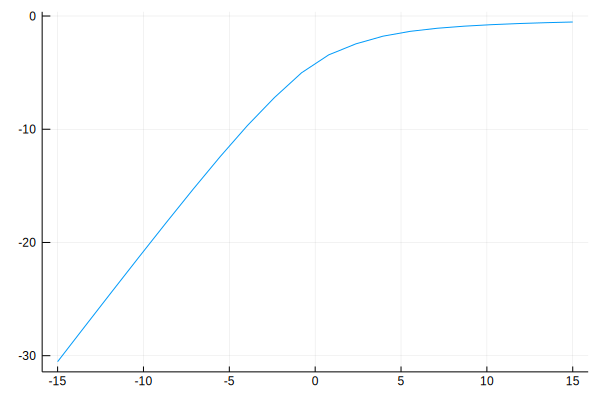

In [3]:
nsite = 4

nU = 20
Us = range(-15,length=nU,stop=15)
μs = Us *0
es = zeros(Float64,nU)
for i=1:nU
    vup,vdown,ene = solve_v(Us[i],nsite)
    println(ene)
    es[i] = ene
    #println(Us[i],"\t",es[i])
end
using Plots
fig = plot(Us,es,labels="")
savefig(fig,"Fig.png")
fig


となります。
厳密対角化の時の値は

In [4]:
es2 = [-30.7674, -27.6916, -24.6343, -21.6022, -18.6048, -15.657, -12.7812, -10.0127, -7.40539, -5.04476, -3.46582, -2.66855, -2.11796, -1.72862, -1.44644, -1.2364, -1.07586, -0.950129, -0.849492, -0.767392]

20-element Array{Float64,1}:
 -30.7674  
 -27.6916  
 -24.6343  
 -21.6022  
 -18.6048  
 -15.657   
 -12.7812  
 -10.0127  
  -7.40539 
  -5.04476 
  -3.46582 
  -2.66855 
  -2.11796 
  -1.72862 
  -1.44644 
  -1.2364  
  -1.07586 
  -0.950129
  -0.849492
  -0.767392

でしたので、比較すると、

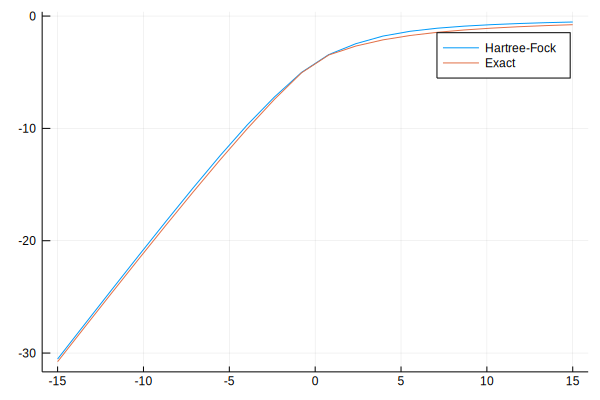

In [5]:
fig = plot(Us,[es,es2],labels=["Hartree-Fock","Exact"])
savefig(fig,"Fig2.png")
fig

となり、4サイトハバード模型の場合にはHartree-Fock近似はよい近似となっていることがわかります。
また、厳密な計算のエネルギーの方が常に低いことにも着目してください。
これは、Hartree-Fock近似を超えた近似を行うことでまだエネルギーが下がる可能性を示唆しています。